In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv(r'D:\PYTON PROGRAMMING\PYTHON FILES\Machine Learning Projects\Ceramic Product Lab Testing\ML_model\magnesia_carbon_data.csv')

In [34]:
df.columns

Index(['sample_id', 'setting', 'total_carbon_wt%', 'graphite_wt%',
       'carbon_black_wt%', 'resin_wt%', 'pitch_wt%', 'graphene_wt%', 'cnt_wt%',
       'gnp_wt%', 'antioxidant_wt%', 'mgo_purity_pct', 'd50_micron',
       'porosity_pct', 'density_g_cm3', 'thermal_conductivity_W_mK',
       'oxidation_mass_loss_pct', 'oxidation_penetration_mm', 'hot_MOR_MPa',
       'slag_contact_angle_deg', 'residual_strength_pct_after_shock',
       'dominant_carbon_source'],
      dtype='object')

In [39]:
df.shape[1]

22

In [35]:
# Composition Columns 
composition_features = [
    'total_carbon_wt%', 'graphite_wt%', 'carbon_black_wt%', 
    'resin_wt%', 'pitch_wt%', 'graphene_wt%', 'cnt_wt%', 
    'gnp_wt%', 'antioxidant_wt%', 'dominant_carbon_source'
]

# Processing Features 
processing_features = [
    'setting', 'mgo_purity_pct', 'd50_micron'
]

# Output Feature
target_properties = [
    'porosity_pct', 'density_g_cm3', 'thermal_conductivity_W_mK',
    'oxidation_mass_loss_pct', 'oxidation_penetration_mm', 
    'hot_MOR_MPa', 'slag_contact_angle_deg', 
    'residual_strength_pct_after_shock'
]

In [36]:
df['dominant_carbon_source'].value_counts()

dominant_carbon_source
graphite        341
carbon_black    104
resin            70
pitch            48
gnp              15
cnt              14
graphene          8
Name: count, dtype: int64

## EDA

In [37]:
# Check if any of the column is not numerical 
df.select_dtypes(include=['object']).columns

Index(['sample_id', 'setting', 'dominant_carbon_source'], dtype='object')

#### Making The Categorical Columns into Numerical 

##### <i>setting column</i>

In [40]:
df['setting'].value_counts()

setting
lab           436
industrial    164
Name: count, dtype: int64

In [41]:
# As there are 2 unique values

df['setting'] = df['setting'].apply(lambda x: 0 if x == 'lab' else 1)   # Lab ---> 0, Industrial ----> 1
df['setting'].value_counts()

setting
0    436
1    164
Name: count, dtype: int64

##### <i>dominant_carbon_source column</i>

In [42]:
# As these values does not have priority order so we would apply one hot encoding


df = pd.get_dummies(df, columns=['dominant_carbon_source'], drop_first=False)

In [43]:
# Making those True False values to int

df = df.astype({col: 'int' for col in df.filter(like='dominant_carbon_source').columns})

In [44]:
df.head(3)

,sample_id,setting,total_carbon_wt%,graphite_wt%,carbon_black_wt%,resin_wt%,pitch_wt%,graphene_wt%,cnt_wt%,gnp_wt%,...,hot_MOR_MPa,slag_contact_angle_deg,residual_strength_pct_after_shock,dominant_carbon_source_carbon_black,dominant_carbon_source_cnt,dominant_carbon_source_gnp,dominant_carbon_source_graphene,dominant_carbon_source_graphite,dominant_carbon_source_pitch,dominant_carbon_source_resin
0,S0001,0,6.866,0.466,0.087,4.734,1.507,0.070,0.000,0.001,...,178.130,81.41,75.11,0,0,0,0,0,0,1
1,S0002,0,4.974,2.809,1.132,0.119,0.723,0.182,0.006,0.003,...,168.611,88.12,84.18,0,0,0,0,1,0,0
2,S0003,0,7.987,1.492,2.682,0.068,0.001,0.039,3.704,0.002,...,312.235,133.52,150.00,0,1,0,0,0,0,0


In [45]:
df.shape[1]

28

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [56]:
X = df.drop(columns=target_properties + ['sample_id'])
y = df[target_properties]  # This creates a DataFrame with multiple columns

In [58]:
y.columns

Index(['porosity_pct', 'density_g_cm3', 'thermal_conductivity_W_mK',
       'oxidation_mass_loss_pct', 'oxidation_penetration_mm', 'hot_MOR_MPa',
       'slag_contact_angle_deg', 'residual_strength_pct_after_shock'],
      dtype='object')

In [59]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Predicting The porosity_pct

In [78]:
# Define model
dt = DecisionTreeRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [None, 4, 10, 15, 20],
    'min_samples_split': [5, 10, 20, 25, 40],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train['porosity_pct'])

,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': [None, 4, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [5, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test['porosity_pct'], y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test['porosity_pct'], y_pred)))
print("R² Score:", r2_score(y_test['porosity_pct'], y_pred))


MAE: 0.9175362994639815
RMSE: 1.096588952213562
R² Score: 0.6107505503212824


In [65]:
df['porosity_pct'].describe()

count    600.000000
mean       2.551450
std        1.836525
min        0.200000
25%        1.056750
50%        2.419000
75%        3.561750
max        9.511000
Name: porosity_pct, dtype: float64

In [81]:
porosity_mean = 2.55
porosity_std = 1.84
porosity_range = 9.51 - 0.20
rmse = 1.09

# Calculate performance metrics
rmse_vs_mean = (rmse / porosity_mean) * 100
rmse_vs_std = (rmse / porosity_std) * 100
rmse_vs_range = (rmse / porosity_range) * 100

print("\nPERFORMANCE INTERPRETATION:")
print(f"• RMSE is {rmse_vs_mean:.1f}% of mean porosity")
print(f"• RMSE is {rmse_vs_std:.1f}% of standard deviation")
print(f"• RMSE is {rmse_vs_range:.1f}% of total range")


PERFORMANCE INTERPRETATION:
• RMSE is 42.7% of mean porosity
• RMSE is 59.2% of standard deviation
• RMSE is 11.7% of total range


In [82]:
target_properties

['porosity_pct',
 'density_g_cm3',
 'thermal_conductivity_W_mK',
 'oxidation_mass_loss_pct',
 'oxidation_penetration_mm',
 'hot_MOR_MPa',
 'slag_contact_angle_deg',
 'residual_strength_pct_after_shock']

## Predicting The density_g_cm3

In [98]:
# Define model
dt = DecisionTreeRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'splitter': ['random'],
    'max_depth': [None, 4, 10, 15, 20],
    'min_samples_split': [5, 10, 20, 25, 80],
    'min_samples_leaf': [1, 2, 5, 20],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train['density_g_cm3'])

,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': [None, 4, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [5, 10, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [99]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Evaluate again
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test['density_g_cm3'], y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test['density_g_cm3'], y_pred)))
print("R² Score:", r2_score(y_test['density_g_cm3'], y_pred))


MAE: 0.044071034630574143
RMSE: 0.05274468048936377
R² Score: 0.43299404716893486


In [ ]:
df['porosity_pct'].describe()

count    600.000000
mean       2.551450
std        1.836525
min        0.200000
25%        1.056750
50%        2.419000
75%        3.561750
max        9.511000
Name: porosity_pct, dtype: float64

## Predicting The thermal_conductivity_W_mK

## Predicting The oxidation_mass_loss_pct

## Predicting The oxidation_penetration_mm

## Predicting The hot_MOR_MPa

## Predicting The slag_contact_angle_deg

## Predicting The residual_strength_pct_after_shock

In [7]:
df['porosity_pct'].describe()

count    600.000000
mean       2.551450
std        1.836525
min        0.200000
25%        1.056750
50%        2.419000
75%        3.561750
max        9.511000
Name: porosity_pct, dtype: float64

#### Observation :
- 

In [8]:
target_properties_float = [col for col in target_properties if col in df.select_dtypes(include=['float64', 'int64']).columns]
print(len(target_properties_float) == len(target_properties))

composition_features_float = [col for col in composition_features if col in df.select_dtypes(include=['float64', 'int64']).columns]
print([col for col in composition_features if col not in composition_features_float])

True
['dominant_carbon_source']


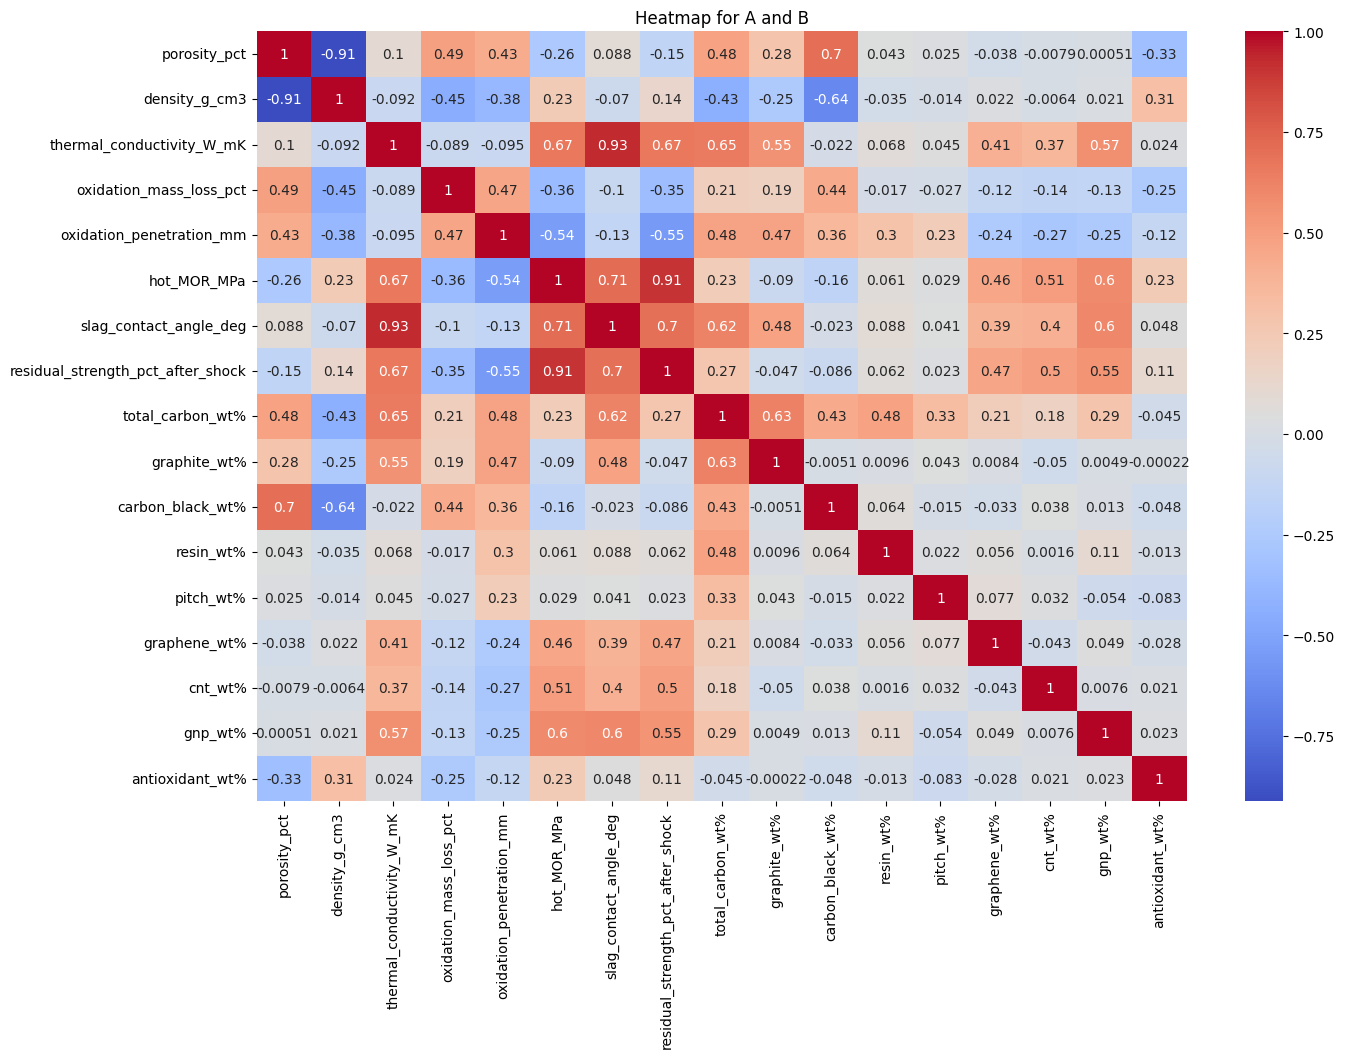

In [9]:
# Draw a correlation plot between 'target_properties_float' and 'composition_features_float'
fig = plt.figure(figsize=(15, 10))
sns.heatmap(df[target_properties_float + composition_features_float].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap for A and B')
plt.show()



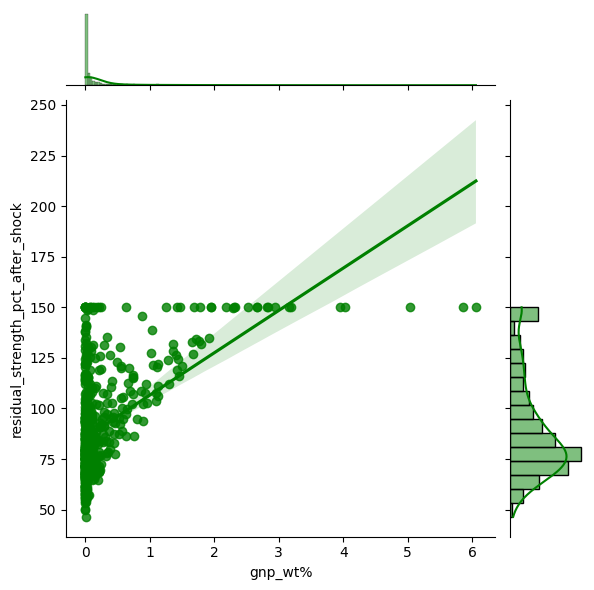

In [10]:
sns.jointplot(x = 'gnp_wt%', y = 'residual_strength_pct_after_shock', data = df, kind = 'reg', color = 'green')

In [1]:
import pandas as pd

# Create the DataFrame from the SQL table data
data = {
    'user_id': [1, 2, 3, 4, 5, 6, 7],
    'name': ['Winston', 'Jonathan', 'Annabelle', 'Sally', 'Marwan', 'David', 'Shapiro'],
    'mail': [
        'winston@leetcode.com',
        'jonathanisgreat',
        'bella-@leetcode.com', 
        'sally.come@leetcode.com',
        'quarz#2020@leetcode.com',
        'david69@gmail.com',
        '.shapo@leetcode.com'
    ]
}

df = pd.DataFrame(data)

In [7]:
def valid_emails(df: pd.DataFrame) -> pd.DataFrame:
    # Only allow letters, numbers, _, ., - in prefix, no # allowed
    pattern = r'^[a-zA-Z][a-zA-Z0-9._-]*@leetcode\.com$'
    return df[df['mail'].str.match(pattern, na=False)]

valid_emails(df)

,user_id,name,mail
0,1,Winston,winston@leetcode.com
2,3,Annabelle,bella-@leetcode.com
3,4,Sally,sally.come@leetcode.com
